In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from itertools import combinations

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
def calcula_percentual_indefinido(dataframe, coluna ):
    indefinidos = dataframe.loc[pd.isna(dataframe[coluna]), coluna].shape[0]
    #total = dataframe.idade.shape[0]
    total = dataframe[coluna].shape[0]

    return (indefinidos/total)* 100

In [44]:
for coluna in df.columns:
  print(f'{coluna}: {calcula_percentual_indefinido(df, coluna)}')

PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 19.865319865319865
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 77.10437710437711
Embarked: 0.22446689113355783


In [45]:
dummies_Sex = pd.get_dummies(df['Sex'])
df['SexMale'] = dummies_Sex['male']
df['SexFemale'] = dummies_Sex['female']

In [46]:
# df = df[np.isfinite(df['Age'])] # Maior acurácia foi de 74.576%
df['Age'].fillna(df['Age'].median(), inplace=True) # Maior acurácia foi de 77.627%
# df['Age'].fillna(df['Age'].mean(), inplace=True) # Maior acurácia foi de 77.627%

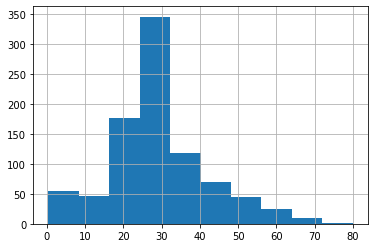

In [47]:
df['Age'].hist()

In [48]:
y = df.Survived.values

In [49]:
x = df.drop(['Survived'], axis=1)

In [36]:
def best_random_state(num_times, x, y, lib):
  import operator
  comb_cols = {}
  mod = lib()
  for number in range(1,4):
    pct = {}
    comb = combinations(x.columns, number)
    for i in list(comb):
      i = list(i)
      for num in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=num)
        mod = mod.fit(X_train[i], y_train)
        y_prev = mod.predict(X_test[i])
        pct[num] = accuracy_score(y_test, y_prev)
        max_key = max(pct.items(), key=operator.itemgetter(1))[0]
        i_str = str(i)
        comb_cols[i_str] = pct[int(max_key)]
  max_key = max(comb_cols.items(), key=operator.itemgetter(1))[0]
  max_value = max(comb_cols.items(), key=operator.itemgetter(1))[1]
  return print(f'Coluna Utilizada: {max_key}\n--------------------------\nTestes Feitos: {num_times}\n\nMelhor porcentagem obtida: {round(max_value*100, 3)}%')

In [11]:
best_random_state(400, x[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], y, tree.DecisionTreeClassifier)

Coluna Utilizada: ['Fare']
Testes Feitos: 400
--------------------------
Melhor random_state obtido: 391
Melhor porcentagem obtida: 76.271%
